In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 

In [2]:
database = 'ipldatabase.sqlite'

In [3]:
conn = sqlite3.connect(database)
cursor = conn.cursor()

tables = pd.read_sql (""" SELECT name FROM sqlite_master
                          WHERE type = 'table'; """, conn)

In [4]:
tables

,name
0,Player
1,Extra_Runs
2,Batsman_Scored
3,Batting_Style
4,Bowling_Style
5,Country
6,Season
7,City
8,Outcome
9,Win_By


Analyzing the player table :-

In [5]:
player = pd.read_sql(""" SELECT * FROM Player
                        ; """, conn)

In [6]:
player

,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,1,SC Ganguly,1972-07-08 00:00:00,1,1.0,1
1,2,BB McCullum,1981-09-27 00:00:00,2,1.0,4
2,3,RT Ponting,1974-12-19 00:00:00,2,1.0,5
3,4,DJ Hussey,1977-07-15 00:00:00,2,2.0,5
4,5,Mohammad Hafeez,1980-10-17 00:00:00,2,2.0,6
...,...,...,...,...,...,...
464,465,DL Chahar,1992-08-07 00:00:00,2,1.0,1
465,466,P Dharmani,1974-09-27 00:00:00,2,NaN,1
466,467,RV Pawar,1979-09-06 00:00:00,1,7.0,1
467,468,KH Devdhar,1989-12-14 00:00:00,2,NaN,1


In [7]:
player_age = pd.read_sql("""SELECT Player_Name, DOB
                            FROM Player
                            ORDER BY DOB;""", conn)
player_age

,Player_Name,DOB
0,ST Jayasuriya,1969-06-30 00:00:00
1,SK Warne,1969-09-13 00:00:00
2,DS Lehmann,1970-02-05 00:00:00
3,GD McGrath,1970-02-09 00:00:00
4,SB Joshi,1970-06-06 00:00:00
...,...,...
464,Mustafizur Rahman,1995-09-06 00:00:00
465,S Kaushik,1995-09-07 00:00:00
466,RR Pant,1997-10-04 00:00:00
467,SN Khan,1997-10-27 00:00:00


# Finding the oldest 20 players

In [8]:
pd.read_sql("""SELECT Player_Name, DOB
               FROM Player
               ORDER BY DOB
               LIMIT 20;""", conn)

,Player_Name,DOB
0,ST Jayasuriya,1969-06-30 00:00:00
1,SK Warne,1969-09-13 00:00:00
2,DS Lehmann,1970-02-05 00:00:00
3,GD McGrath,1970-02-09 00:00:00
4,SB Joshi,1970-06-06 00:00:00
5,A Kumble,1970-10-17 00:00:00
6,GB Hogg,1971-02-06 00:00:00
7,PV Tambe,1971-10-08 00:00:00
8,DR Martyn,1971-10-21 00:00:00
9,ML Hayden,1971-10-29 00:00:00


# Finding the youngest 20 players

In [9]:
pd.read_sql("""SELECT Player_Name, DOB
               FROM Player
               ORDER BY DOB DESC
               LIMIT 20;""", conn)

,Player_Name,DOB
0,Ishan Kishan,1998-07-18 00:00:00
1,SN Khan,1997-10-27 00:00:00
2,RR Pant,1997-10-04 00:00:00
3,S Kaushik,1995-09-07 00:00:00
4,Mustafizur Rahman,1995-09-06 00:00:00
5,DJ Hooda,1995-04-19 00:00:00
6,Kuldeep Yadav,1994-12-14 00:00:00
7,SS Iyer,1994-12-06 00:00:00
8,VH Zol,1994-11-23 00:00:00
9,SV Samson,1994-11-11 00:00:00


Analyzing the country table :-

In [10]:
country = pd.read_sql ("""SELECT * FROM country;""",conn)
country

,Country_Id,Country_Name
0,1,India
1,2,South Africa
2,3,U.A.E
3,4,New Zealand
4,5,Australia
5,6,Pakistan
6,7,Sri Lanka
7,8,West Indies
8,9,Zimbabwea
9,10,England


# Finding the players and their corresponding country

In [11]:
pd.read_sql("""SELECT * 
               FROM Player
               INNER JOIN Country
               ON Player.Country_Name = Country.Country_Id;""", conn)

,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Country_Id,Country_Name
0,1,SC Ganguly,1972-07-08 00:00:00,1,1.0,1,1,India
1,2,BB McCullum,1981-09-27 00:00:00,2,1.0,4,4,New Zealand
2,3,RT Ponting,1974-12-19 00:00:00,2,1.0,5,5,Australia
3,4,DJ Hussey,1977-07-15 00:00:00,2,2.0,5,5,Australia
4,5,Mohammad Hafeez,1980-10-17 00:00:00,2,2.0,6,6,Pakistan
...,...,...,...,...,...,...,...,...
464,465,DL Chahar,1992-08-07 00:00:00,2,1.0,1,1,India
465,466,P Dharmani,1974-09-27 00:00:00,2,NaN,1,1,India
466,467,RV Pawar,1979-09-06 00:00:00,1,7.0,1,1,India
467,468,KH Devdhar,1989-12-14 00:00:00,2,NaN,1,1,India


In [12]:
player_country = pd.read_sql("""SELECT Player_Name, country.Country_Name
               FROM Player
               INNER JOIN Country
               ON Player.Country_Name = Country.Country_Id;""", conn)
player_country

,Player_Name,Country_Name
0,SC Ganguly,India
1,BB McCullum,New Zealand
2,RT Ponting,Australia
3,DJ Hussey,Australia
4,Mohammad Hafeez,Pakistan
...,...,...
464,DL Chahar,India
465,P Dharmani,India
466,RV Pawar,India
467,KH Devdhar,India


# How many players are their from each country?

In [13]:
num_players = pd.read_sql("""SELECT COUNT(country.Country_Name) AS number_of_players, country.Country_Name
               FROM Player
               INNER JOIN Country
               ON Player.Country_Name = Country.Country_Id
               
               GROUP BY country.Country_Name
               ORDER BY number_of_players DESC;""", conn)
num_players

,number_of_players,Country_Name
0,262,India
1,72,Australia
2,39,South Africa
3,22,New Zealand
4,20,Sri Lanka
5,19,West Indies
6,14,England
7,13,Pakistan
8,5,Bangladesh
9,2,Zimbabwea


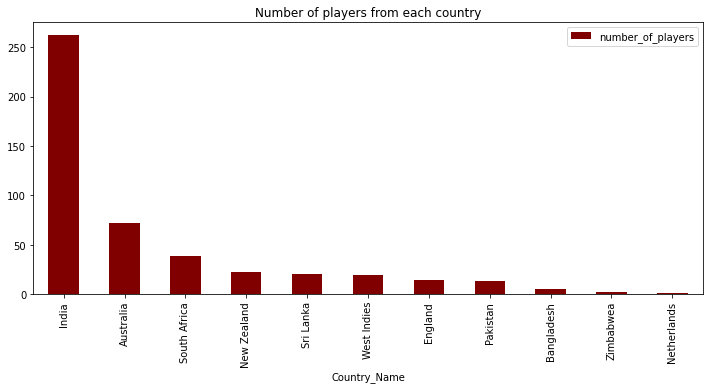

In [14]:
num_players.plot (kind = 'bar' ,x = 'Country_Name', y = 'number_of_players',  
                  figsize= (12,5), color ='maroon' ,title = 'Number of players from each country')

# Finding the Batting and Bowling style of players

In [15]:
pd.read_sql ("""SELECT Player_Id, Player_Name, Batting_Style.Batting_hand, Bowling_Style.Bowling_skill
                FROM Player
                INNER JOIN Batting_Style 
                ON Player.Batting_hand = Batting_Style.Batting_Id
                INNER JOIN Bowling_Style
                ON Player.Bowling_skill = Bowling_Style.Bowling_Id;""", conn)

,Player_Id,Player_Name,Batting_hand,Bowling_skill
0,1,SC Ganguly,Left-hand bat,Right-arm medium
1,2,BB McCullum,Right-hand bat,Right-arm medium
2,3,RT Ponting,Right-hand bat,Right-arm medium
3,4,DJ Hussey,Right-hand bat,Right-arm offbreak
4,5,Mohammad Hafeez,Right-hand bat,Right-arm offbreak
...,...,...,...,...
421,463,T Shamsi,Right-hand bat,Slow left-arm chinaman
422,464,SM Boland,Right-hand bat,Right-arm fast-medium
423,465,DL Chahar,Right-hand bat,Right-arm medium
424,467,RV Pawar,Left-hand bat,Slow left-arm orthodox


Creating a view of the query above :-

In [16]:
cursor.execute("DROP VIEW IF EXISTS bat_bowl_style")
cursor.execute("""
  CREATE VIEW
  bat_bowl_style (Player_Id, Player_Name, Batting_hand, Bowling_skill)
  AS
  SELECT Player_Id, Player_Name, Batting_Style.Batting_hand, Bowling_Style.Bowling_skill
                FROM Player
                INNER JOIN Batting_Style 
                ON Player.Batting_hand = Batting_Style.Batting_Id
                INNER JOIN Bowling_Style
                ON Player.Bowling_skill = Bowling_Style.Bowling_Id
  """)

In [17]:
bat_style = pd.read_sql("""SELECT COUNT(Batting_hand) AS number, Batting_hand
                           FROM bat_bowl_style
                           
                           GROUP BY Batting_hand;""", conn)
bat_style

,number,Batting_hand
0,113,Left-hand bat
1,313,Right-hand bat


So, out of 426 players, 313 players are right handed batsmen, while the rest 113 players are left handed.

In [18]:
bowl_style = pd.read_sql("""SELECT COUNT(Bowling_skill) AS number, Bowling_skill
                            FROM bat_bowl_style
                            GROUP BY Bowling_skill
                            ORDER BY number DESC;""", conn)
bowl_style

,number,Bowling_skill
0,104,Right-arm medium
1,81,Right-arm offbreak
2,53,Right-arm fast-medium
3,44,Slow left-arm orthodox
4,38,Right-arm medium-fast
5,24,Legbreak
6,21,Legbreak googly
7,20,Right-arm fast
8,13,Left-arm fast-medium
9,11,Left-arm medium


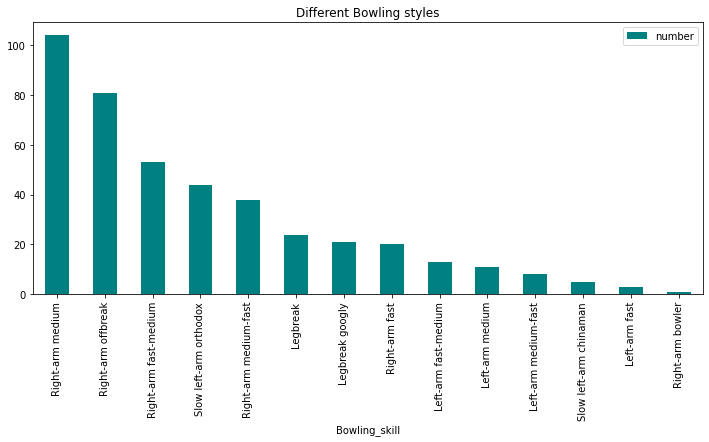

In [19]:
bowl_style.plot(kind ='bar', x = 'Bowling_skill', y = 'number',
               figsize = (12,5), color = 'teal', title = 'Different Bowling styles')

It is observed that Right arm bowlers too are more common than left arm ones. Moreover, there are more medium pace bowlers than fast ones.

Analyzing the venue table :-

In [20]:
pd.read_sql("""SELECT * FROM Venue;""", conn)

,Venue_Id,Venue_Name,City_Id
0,1,M Chinnaswamy Stadium,1
1,2,"Punjab Cricket Association Stadium, Mohali",2
2,3,Feroz Shah Kotla,3
3,4,Wankhede Stadium,4
4,5,Eden Gardens,5
5,6,Sawai Mansingh Stadium,6
6,7,"Rajiv Gandhi International Stadium, Uppal",7
7,8,"MA Chidambaram Stadium, Chepauk",8
8,9,Dr DY Patil Sports Academy,4
9,10,Newlands,9


# Matching the venues with their corresponding city and country

In [21]:
venue_city = pd.read_sql("""SELECT Venue_Id, Venue_Name, City_Name, Country_Name
                            FROM Venue
                            INNER JOIN City
                            ON Venue.City_Id = City.City_Id
                            INNER JOIN Country
                            ON City.Country_Id = Country.Country_Id;""", conn)
venue_city

,Venue_Id,Venue_Name,City_Name,Country_Name
0,1,M Chinnaswamy Stadium,Bangalore,India
1,2,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India
2,3,Feroz Shah Kotla,Delhi,India
3,4,Wankhede Stadium,Mumbai,India
4,5,Eden Gardens,Kolkata,India
5,6,Sawai Mansingh Stadium,Jaipur,India
6,7,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India
7,8,"MA Chidambaram Stadium, Chepauk",Chennai,India
8,9,Dr DY Patil Sports Academy,Mumbai,India
9,10,Newlands,Cape Town,South Africa


# How many matches have been hosted by each venue? 

In [22]:
venue_match = pd.read_sql("""SELECT Venue.Venue_Id, Venue_Name, City_Name, Country_Name, Match_Id
                            FROM Venue
                            INNER JOIN City
                            ON Venue.City_Id = City.City_Id
                            INNER JOIN Country
                            ON City.Country_Id = Country.Country_Id
                            INNER JOIN Match
                            ON Venue.Venue_Id = Match.Venue_Id;
                             """, conn)
venue_match

,Venue_Id,Venue_Name,City_Name,Country_Name,Match_Id
0,1,M Chinnaswamy Stadium,Bangalore,India,335987
1,2,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India,335988
2,3,Feroz Shah Kotla,Delhi,India,335989
3,4,Wankhede Stadium,Mumbai,India,335990
4,5,Eden Gardens,Kolkata,India,335991
...,...,...,...,...,...
572,27,Shaheed Veer Narayan Singh International Stadium,Raipur,India,981016
573,1,M Chinnaswamy Stadium,Bangalore,India,981018
574,3,Feroz Shah Kotla,Delhi,India,981020
575,3,Feroz Shah Kotla,Delhi,India,981022


In [23]:
venue_by_match = pd.read_sql("""SELECT COUNT (DISTINCT(Match_Id)) AS num_matches, Venue_Name
                            FROM Venue
                            INNER JOIN City
                            ON Venue.City_Id = City.City_Id
                            INNER JOIN Country
                            ON City.Country_Id = Country.Country_Id
                            INNER JOIN Match
                            ON Venue.Venue_Id = Match.Venue_Id
                            GROUP BY Venue_Name
                            ORDER BY num_matches DESC;
                             """, conn)
venue_by_match

,num_matches,Venue_Name
0,58,M Chinnaswamy Stadium
1,54,Eden Gardens
2,53,Feroz Shah Kotla
3,49,Wankhede Stadium
4,48,"MA Chidambaram Stadium, Chepauk"
5,41,"Rajiv Gandhi International Stadium, Uppal"
6,35,"Punjab Cricket Association Stadium, Mohali"
7,33,Sawai Mansingh Stadium
8,17,Subrata Roy Sahara Stadium
9,17,Dr DY Patil Sports Academy


So the M Chinnaswamy Stadium in Bangalore has hosted the most number of IPL matches, followed by Eden Gardens in Kolkata. The least number of matches have been hosted by Green Park in Kanpur.

Visualizing the number of IPL matches hosted by each venue :-

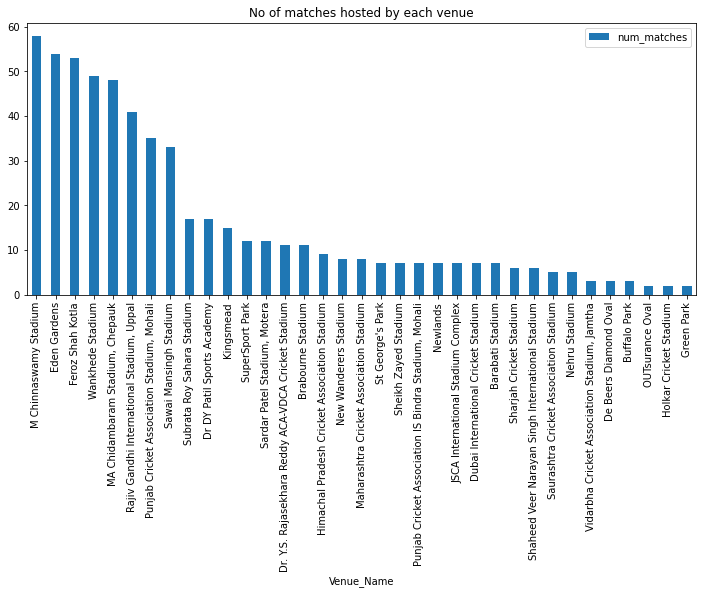

In [24]:
venue_by_match.plot (kind = 'bar', x = 'Venue_Name', y = 'num_matches',
                    figsize = (12,5), title = 'No of matches hosted by each venue')

Analysing the season table:-

In [25]:
pd.read_sql("""SELECT * FROM Season;""", conn)

,Season_Id,Man_of_the_Series,Orange_Cap,Purple_Cap,Season_Year
0,1,32,100,102,2008
1,2,53,18,61,2009
2,3,133,133,131,2010
3,4,162,162,194,2011
4,5,315,162,190,2012
5,6,32,19,71,2013
6,7,305,46,364,2014
7,8,334,187,71,2015
8,9,8,8,299,2016


# Finding the man of the series award winners from 2008-16

In [26]:
pd.read_sql("""SELECT Season_Year, Player_Name AS Man_of_the_series
               FROM Season
               INNER JOIN Player
               ON Season.Man_of_the_Series = Player.Player_Id;""", conn)

,Season_Year,Man_of_the_series
0,2008,SR Watson
1,2009,AC Gilchrist
2,2010,SR Tendulkar
3,2011,CH Gayle
4,2012,SP Narine
5,2013,SR Watson
6,2014,GJ Maxwell
7,2015,AD Russell
8,2016,V Kohli


# Finding the orange cap winners

The orange cap is awarded to those batsmen who score the most number of runs in an IPL season. 

In [27]:
pd.read_sql("""SELECT Season_Year, Player_Name AS Orange_Cap_winners
               FROM Season
               INNER JOIN Player
               ON Season.Orange_Cap = Player.Player_Id;""", conn)

,Season_Year,Orange_Cap_winners
0,2008,SE Marsh
1,2009,ML Hayden
2,2010,SR Tendulkar
3,2011,CH Gayle
4,2012,CH Gayle
5,2013,MEK Hussey
6,2014,RV Uthappa
7,2015,DA Warner
8,2016,V Kohli


# Finding the purple cap winners

The purple cap is awarded to those bowlers who take the most number of wickets in an IPL season.

In [28]:
pd.read_sql("""SELECT Season_Year, Player_Name AS Purple_Cap_winners
               FROM Season
               INNER JOIN Player
               ON Season.Purple_Cap = Player.Player_Id;""", conn)

,Season_Year,Purple_Cap_winners
0,2008,Sohail Tanvir
1,2009,RP Singh
2,2010,PP Ojha
3,2011,SL Malinga
4,2012,M Morkel
5,2013,DJ Bravo
6,2014,MM Sharma
7,2015,DJ Bravo
8,2016,B Kumar


Analyzing the match table :-

In [29]:
pd.read_sql("""SELECT * FROM Match;""", conn)

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
0,335987,2,1,2008-04-18 00:00:00,1,1,2,1,1,140.0,1,1.0,2.0
1,335988,4,3,2008-04-19 00:00:00,1,2,3,2,1,33.0,1,3.0,19.0
2,335989,6,5,2008-04-19 00:00:00,1,3,5,2,2,9.0,1,6.0,90.0
3,335990,7,2,2008-04-20 00:00:00,1,4,7,2,2,5.0,1,2.0,11.0
4,335991,1,8,2008-04-20 00:00:00,1,5,8,2,2,5.0,1,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,6,2,2016-05-22 00:00:00,9,27,2,1,2,6.0,1,2.0,8.0
573,981018,13,2,2016-05-24 00:00:00,9,1,2,1,2,4.0,1,2.0,110.0
574,981020,11,1,2016-05-25 00:00:00,9,3,1,1,1,22.0,1,11.0,163.0
575,981022,13,11,2016-05-27 00:00:00,9,3,11,1,2,4.0,1,11.0,187.0


# Which teams have won the most matches ?

In [30]:
winning_teams = pd.read_sql("""SELECT Match_Id, Team_Name
                               FROM Match
                               INNER JOIN Team
                               ON Match.Match_Winner = Team.Team_Id;""", conn)
winning_teams

,Match_Id,Team_Name
0,335987,Kolkata Knight Riders
1,335988,Chennai Super Kings
2,335989,Delhi Daredevils
3,335990,Royal Challengers Bangalore
4,335991,Kolkata Knight Riders
...,...,...
569,981016,Royal Challengers Bangalore
570,981018,Royal Challengers Bangalore
571,981020,Sunrisers Hyderabad
572,981022,Sunrisers Hyderabad


In [31]:
winning_teams = pd.read_sql("""SELECT COUNT(Match_Id) AS num_matches_won, Team_Name
                               FROM Match
                               INNER JOIN Team
                               ON Match.Match_Winner = Team.Team_Id
                               GROUP BY Team_Name
                               ORDER BY num_matches_won DESC;""", conn)
winning_teams

,num_matches_won,Team_Name
0,80,Mumbai Indians
1,79,Chennai Super Kings
2,70,Royal Challengers Bangalore
3,68,Kolkata Knight Riders
4,63,Rajasthan Royals
5,63,Kings XI Punjab
6,56,Delhi Daredevils
7,34,Sunrisers Hyderabad
8,29,Deccan Chargers
9,12,Pune Warriors


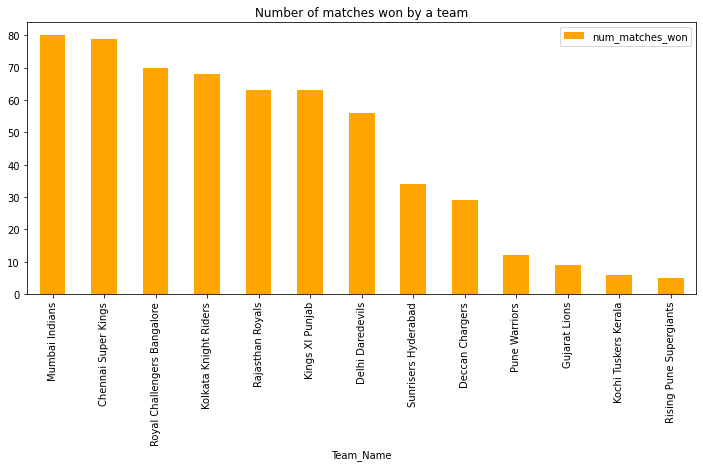

In [32]:
winning_teams.plot(kind = 'bar', x = 'Team_Name', y = 'num_matches_won',
                  figsize =(12,5), color= 'orange', title = 'Number of matches won by a team')

# Finding the Man of the Match winners

In [33]:
pd.read_sql("""SELECT Match_Id, Player_Name AS Man_of_the_match FROM Match
                     INNER JOIN Player
                     ON Match.Man_of_the_Match = Player.Player_Id;""", conn)

,Match_Id,Man_of_the_match
0,335987,BB McCullum
1,335988,MEK Hussey
2,335989,MF Maharoof
3,335990,MV Boucher
4,335991,DJ Hussey
...,...,...
569,981016,V Kohli
570,981018,AB de Villiers
571,981020,MC Henriques
572,981022,DA Warner


In [34]:
mom = pd.read_sql("""SELECT COUNT(Match_Id) AS num_matches, Player_Name AS Man_of_the_match FROM Match
                     INNER JOIN Player
                     ON Match.Man_of_the_Match = Player.Player_Id
                     
                     GROUP BY Man_of_the_match
                     ORDER BY num_matches DESC
                     LIMIT 10;""", conn)
mom

,num_matches,Man_of_the_match
0,17,CH Gayle
1,16,YK Pathan
2,15,AB de Villiers
3,14,DA Warner
4,13,RG Sharma
5,13,SK Raina
6,12,AM Rahane
7,12,G Gambhir
8,12,MS Dhoni
9,12,MEK Hussey


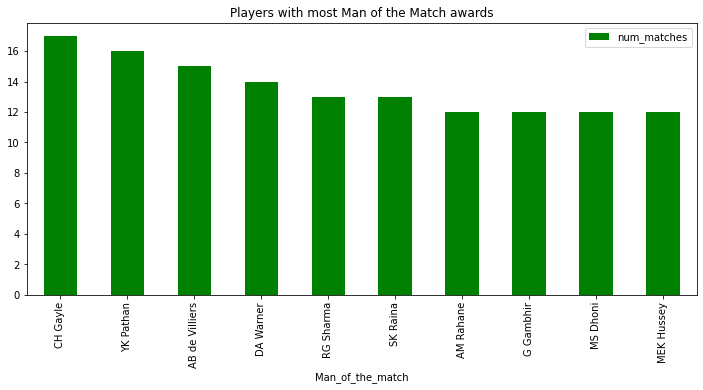

In [35]:
mom.plot(kind = 'bar', x ='Man_of_the_match', y ='num_matches', 
        figsize= (12,5), color = 'green', title = 'Players with most Man of the Match awards')

The bar chart above shows the top 10 players with most man of the match awards.

# Finding the IPL Captains over the years

In [36]:
pd.read_sql("""SELECT * FROM Player_Match;""",conn)

,Match_Id,Player_Id,Role_Id,Team_Id
0,335987,1,1,1
1,335987,2,3,1
2,335987,3,3,1
3,335987,4,3,1
4,335987,5,3,1
...,...,...,...,...
12689,981024,385,3,11
12690,981024,394,3,11
12691,981024,429,3,11
12692,981024,434,3,2


In [37]:
pd.read_sql("""SELECT * FROM Player_Match
               INNER JOIN Rolee
               ON Player_Match.Role_Id = Rolee.Role_Id;""", conn)

,Match_Id,Player_Id,Role_Id,Team_Id,Role_Id,Role_Desc
0,335987,1,1,1,1,Captain
1,335987,2,3,1,3,Player
2,335987,3,3,1,3,Player
3,335987,4,3,1,3,Player
4,335987,5,3,1,3,Player
...,...,...,...,...,...,...
12689,981024,385,3,11,3,Player
12690,981024,394,3,11,3,Player
12691,981024,429,3,11,3,Player
12692,981024,434,3,2,3,Player


In [38]:
captains = pd.read_sql("""SELECT Match_Id, Player_Id, Role_Desc FROM Player_Match
                          INNER JOIN Rolee
                          ON Player_Match.Role_Id = Rolee.Role_Id
                          WHERE Role_Desc = 'Captain';""", conn)
captains

,Match_Id,Player_Id,Role_Desc
0,335987,1,Captain
1,335987,6,Captain
2,335988,27,Captain
3,335989,38,Captain
4,335989,41,Captain
...,...,...,...
900,981020,187,Captain
901,981022,21,Captain
902,981022,187,Captain
903,981024,8,Captain


In [39]:
captains = pd.read_sql("""SELECT Match_Id, Player_Match.Player_Id, Player_Name, Role_Desc FROM Player_Match
                          INNER JOIN Rolee
                          ON Player_Match.Role_Id = Rolee.Role_Id
                          INNER JOIN Player
                          ON Player_Match.Player_Id = Player.Player_Id
                          WHERE Role_Desc = 'Captain';""", conn)
captains

,Match_Id,Player_Id,Player_Name,Role_Desc
0,335987,1,SC Ganguly,Captain
1,335987,6,R Dravid,Captain
2,335988,27,Yuvraj Singh,Captain
3,335989,38,SK Warne,Captain
4,335989,41,V Sehwag,Captain
...,...,...,...,...
900,981020,187,DA Warner,Captain
901,981022,21,SK Raina,Captain
902,981022,187,DA Warner,Captain
903,981024,8,V Kohli,Captain


# Finding the number of matches captained

In [40]:
match_capt = pd.read_sql("""SELECT COUNT(Match_Id) AS num_matches,  Player_Name FROM Player_Match
                          INNER JOIN Rolee
                          ON Player_Match.Role_Id = Rolee.Role_Id
                          INNER JOIN Player
                          ON Player_Match.Player_Id = Player.Player_Id
                          
                          WHERE Role_Desc = 'Captain'
                          GROUP BY Player_Name
                          ORDER BY num_matches DESC
                          LIMIT 20;""", conn)
match_capt

,num_matches,Player_Name
0,107,G Gambhir
1,71,V Kohli
2,58,RG Sharma
3,55,SK Warne
4,53,V Sehwag
5,51,SR Tendulkar
6,48,R Dravid
7,43,Yuvraj Singh
8,42,SC Ganguly
9,33,DA Warner


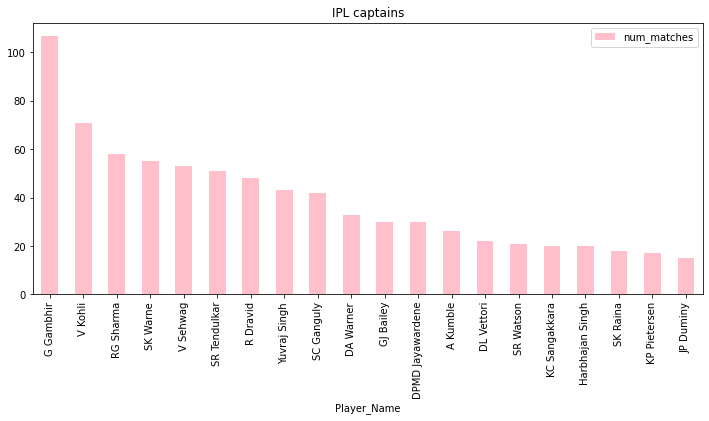

In [41]:
match_capt.plot(kind = 'bar', x = 'Player_Name', y = 'num_matches',
               figsize = (12,5), color = 'pink', title = 'IPL captains')

# How does toss affect the match outcome?

In [42]:
pd.read_sql("""SELECT COUNT(*) FROM Match
               WHERE Toss_Winner = Match_Winner;""", conn)

,COUNT(*)
0,291


In [43]:
pd.read_sql("""SELECT COUNT(*) FROM Match
               WHERE Toss_Winner != Match_Winner;""", conn)

,COUNT(*)
0,283


So, the team winning the toss has a slight edge over the other team with a 50.69% winning chance.

In [44]:
pd.read_sql("""SELECT COUNT(*), Toss_Name 
               FROM Match
               INNER JOIN Toss_Decision
               ON Match.Toss_Decide = Toss_Decision.Toss_Id
               
               WHERE Toss_Winner = Match_Winner
               AND Toss_Decide = 1;""", conn)

,COUNT(*),Toss_Name
0,173,field


In [45]:
pd.read_sql("""SELECT COUNT(*), Toss_Name 
               FROM Match
               INNER JOIN Toss_Decision
               ON Match.Toss_Decide = Toss_Decision.Toss_Id
               
               WHERE Toss_Winner = Match_Winner
               AND Toss_Decide = 2;""", conn)

,COUNT(*),Toss_Name
0,118,bat


So as per IPL statistics, the team that decides to field first has an edge, with a winning chance of 59.45%.

# Finding the highest wicket takers in the history of IPL

In [46]:
pd.read_sql("""SELECT * FROM Wicket_Taken;""", conn)

,Match_Id,Over_Id,Ball_Id,Player_Out,Kind_Out,Fielders,Innings_No
0,335987,2,1,6,2,NaN,2
1,335987,3,2,8,2,NaN,2
2,335987,5,5,9,1,83.0,2
3,335987,6,2,1,1,9.0,1
4,335987,6,2,7,1,3.0,2
...,...,...,...,...,...,...,...
6722,981024,17,3,32,1,163.0,2
6723,981024,18,3,183,3,32.0,1
6724,981024,19,1,255,3,394.0,2
6725,981024,19,4,228,1,382.0,1


In [47]:
pd.read_sql("""SELECT * FROM Ball_by_Ball;""", conn)

,Match_Id,Over_Id,Ball_Id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Striker,Non_Striker,Bowler
0,335987,1,1,1,1,2,1,1,2,14
1,335987,1,1,2,2,1,1,6,7,106
2,335987,1,2,1,1,2,2,2,1,14
3,335987,1,2,2,2,1,2,7,6,106
4,335987,1,3,1,1,2,2,2,1,14
...,...,...,...,...,...,...,...,...,...,...
136585,981024,20,4,2,2,11,9,140,369,299
136586,981024,20,5,1,11,2,9,299,385,32
136587,981024,20,5,2,2,11,6,369,140,299
136588,981024,20,6,1,11,2,7,385,299,32


In [48]:
pd.read_sql("""SELECT * FROM Out_Type;""", conn)

,Out_Id,Out_Name
0,1,caught
1,2,bowled
2,3,run out
3,4,lbw
4,5,retired hurt
5,6,stumped
6,7,caught and bowled
7,8,hit wicket
8,9,obstructing the field


Since, we are finding the highest wicket taking bowlers, we need to consider the wickets apart from run outs and retired hurt.

In [55]:
pd.read_sql("""SELECT Wicket_Taken.Match_Id, Wicket_Taken.Over_Id, Wicket_Taken.Ball_Id, Wicket_Taken.Kind_Out, 
               Wicket_Taken.Innings_No, Bowler
               FROM Wicket_Taken
               INNER JOIN Ball_by_Ball
               ON Wicket_Taken.Match_Id = Ball_by_Ball.Match_Id
               AND Wicket_Taken.Over_Id = Ball_by_Ball.Over_Id
               AND Wicket_Taken.Ball_Id = Ball_by_Ball.Ball_Id
               AND Wicket_Taken.Innings_No = Ball_by_Ball.Innings_No;""", conn)

,Match_Id,Over_Id,Ball_Id,Kind_Out,Innings_No,Bowler
0,335987,2,1,2,2,84
1,335987,3,2,2,2,106
2,335987,5,5,1,2,82
3,335987,6,2,1,1,15
4,335987,6,2,1,2,106
...,...,...,...,...,...,...
6722,981024,17,3,1,2,460
6723,981024,18,3,3,1,32
6724,981024,19,1,3,2,460
6725,981024,19,4,1,1,434


In [57]:
bowler= pd.read_sql("""SELECT Wicket_Taken.Match_Id, Wicket_Taken.Over_Id, Wicket_Taken.Ball_Id, Wicket_Taken.Kind_Out, 
               Wicket_Taken.Innings_No, Bowler, Player_Name AS bowler_name
               FROM Wicket_Taken
               INNER JOIN Ball_by_Ball
               ON Wicket_Taken.Match_Id = Ball_by_Ball.Match_Id
               AND Wicket_Taken.Over_Id = Ball_by_Ball.Over_Id
               AND Wicket_Taken.Ball_Id = Ball_by_Ball.Ball_Id
               AND Wicket_Taken.Innings_No = Ball_by_Ball.Innings_No
               
               INNER JOIN Player
               ON Ball_by_Ball.Bowler = Player.Player_Id
               
               WHERE Kind_Out != 3 AND Kind_Out!= 5;""", conn)
bowler

,Match_Id,Over_Id,Ball_Id,Kind_Out,Innings_No,Bowler,bowler_name
0,335987,2,1,2,2,84,I Sharma
1,335987,3,2,2,2,106,AB Dinda
2,335987,5,5,1,2,82,AB Agarkar
3,335987,6,2,1,1,15,Z Khan
4,335987,6,2,1,2,106,AB Dinda
...,...,...,...,...,...,...,...
6017,981024,16,3,2,2,385,BCJ Cutting
6018,981024,16,6,1,1,270,S Aravind
6019,981024,17,2,1,1,434,CJ Jordan
6020,981024,17,3,1,2,460,Mustafizur Rahman


The above code only includes wickets which can be credited to the bowler and not run outs/ retired hurt wickets.

In [62]:
cursor.execute("DROP VIEW IF EXISTS bowler_data")
cursor.execute("""
  CREATE VIEW
  bowler_data (Match_Id, Over_Id, Ball_Id, Kind_Out, Innings_No, Bowler, bowler_name)
  AS
  
  SELECT Wicket_Taken.Match_Id, Wicket_Taken.Over_Id, Wicket_Taken.Ball_Id, Wicket_Taken.Kind_Out, 
               Wicket_Taken.Innings_No, Bowler, Player_Name AS bowler_name
               FROM Wicket_Taken
               INNER JOIN Ball_by_Ball
               ON Wicket_Taken.Match_Id = Ball_by_Ball.Match_Id
               AND Wicket_Taken.Over_Id = Ball_by_Ball.Over_Id
               AND Wicket_Taken.Ball_Id = Ball_by_Ball.Ball_Id
               AND Wicket_Taken.Innings_No = Ball_by_Ball.Innings_No
               
               INNER JOIN Player
               ON Ball_by_Ball.Bowler = Player.Player_Id
               
               WHERE Kind_Out != 3 AND Kind_Out!= 5  """)

In [64]:
wicket_taker = pd.read_sql ("""SELECT COUNT(Kind_Out) AS num_wickets, bowler_name
                               FROM bowler_data
                               GROUP BY bowler_name
                               ORDER BY num_wickets DESC
                               LIMIT 20;""", conn)
wicket_taker

,num_wickets,bowler_name
0,143,SL Malinga
1,124,A Mishra
2,122,DJ Bravo
3,120,PP Chawla
4,119,Harbhajan Singh
5,101,R Vinay Kumar
6,100,R Ashwin
7,98,A Nehra
8,92,Z Khan
9,92,DW Steyn


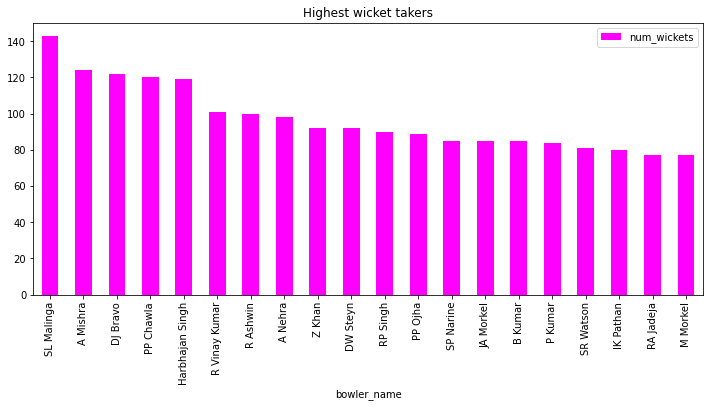

In [65]:
wicket_taker.plot(kind = 'bar', x = 'bowler_name', y = 'num_wickets',
                 figsize =(12,5), color = 'magenta', title = 'Highest wicket takers')

The bar chart above shows the 20 highest wicket takers in IPL history till 2016.

# Finding the highest run scorers in the history of IPL

In [66]:
pd.read_sql("""SELECT * FROM Batsman_Scored;""", conn)

,Match_Id,Over_Id,Ball_Id,Runs_Scored,Innings_No
0,335987,1,1,0,1
1,335987,1,1,1,2
2,335987,1,2,0,1
3,335987,1,3,0,2
4,335987,1,4,0,1
...,...,...,...,...,...
133092,981024,20,4,0,2
133093,981024,20,5,1,1
133094,981024,20,5,1,2
133095,981024,20,6,6,1


In [69]:
pd.read_sql("""SELECT Batsman_Scored.Match_Id, Batsman_Scored.Over_Id, Batsman_Scored.Ball_Id, Batsman_Scored.Runs_Scored, 
               Batsman_Scored.Innings_No, Striker, Player_Name AS Striker_Name
               FROM Batsman_Scored
               INNER JOIN Ball_by_Ball
               ON Batsman_Scored.Match_Id = Ball_by_Ball.Match_Id
               AND Batsman_Scored.Over_Id = Ball_by_Ball.Over_Id
               AND Batsman_Scored.Ball_Id = Ball_by_Ball.Ball_Id
               AND Batsman_Scored.Innings_No = Ball_by_Ball.Innings_No
               
               INNER JOIN Player
               ON Ball_by_Ball.Striker = Player.Player_Id;""", conn)

,Match_Id,Over_Id,Ball_Id,Runs_Scored,Innings_No,Striker,Striker_Name
0,335987,1,1,0,1,1,SC Ganguly
1,335987,1,1,1,2,6,R Dravid
2,335987,1,2,0,1,2,BB McCullum
3,335987,1,3,0,2,7,W Jaffer
4,335987,1,4,0,1,2,BB McCullum
...,...,...,...,...,...,...,...
133092,981024,20,4,0,2,140,Iqbal Abdulla
133093,981024,20,5,1,1,299,B Kumar
133094,981024,20,5,1,2,369,Sachin Baby
133095,981024,20,6,6,1,385,BCJ Cutting
